In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# importing the dataset
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
    
# deleting the columns with unique values and rescaling
X = X[:, ~np.all(X[1:] == X[:-1], axis=0)]
X = X/255
scaler = StandardScaler()
X = scaler.fit_transform(X)

# check if mean = 0 and std = 1
#print(X.mean(axis = 0))
#print(X.std(axis = 0))

In [8]:
# splitting the data into train, validation and test
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_valid , y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size = 0.25, random_state=0)

In [17]:
for n_comp in [2, 10, 50, 100, 150, 200]: 
    pca = PCA(n_components=n_comp)
    pca.fit(X_train)
    X_proj = pca.transform(X_train)
    print(X_proj.shape)
    
    ms = MeanShift(bandwidth=None)
    ms.fit(X_proj)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    print("number of estimated clusters : %d" % n_clusters_)
    
    # compute accuracy below...

(42000, 2)


KeyboardInterrupt: 

In [12]:
pca = PCA(n_components=2)
pca.fit(X_valid)
X_proj = pca.transform(X_valid)
print(X_proj.shape)

(14000, 2)


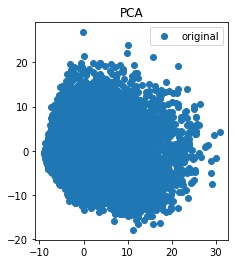

In [14]:
fig, ax = plt.subplots()

ax.plot(X_proj[:,0], X_proj[:,1], 'o', label="original" )

ax.set_title("PCA")
ax.set_aspect('equal')
ax.legend()